In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
class NN:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learningrate    
        pass
    
    def activation_function(self,x):
        return 1/(1+numpy.exp(-x))
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))       
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [3]:
training_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_train.csv')
training_data_list = training_data_file.to_numpy()
test_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_test.csv')
test_data_list = test_data_file.to_numpy()

## 0. 기존 MNIST 데이터로 트레이닝 / 테스트하며 최적의 하이퍼파라미터를 찾기 위한 과정

In [4]:
def ANN(hidden_nodes, learning_rate, num_epoch):
  # hidden_nodes = int(input("Hidden Node 개수를 입력하세요: "))
  # learning_rate = float(input("Learning Rate를 입력하세요: "))
  input_nodes = 784
  output_nodes = 10
  # epochs = int(input("Epoch를 입력하세요: "))
  epochs = num_epoch
  n = NN(input_nodes,hidden_nodes,output_nodes, learning_rate)
  
  pf_list = []
  for e in range(epochs):
    for record in training_data_list:
        inputs = (record[1:] / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[record[0]] = 0.99
        n.train(inputs, targets)
        
    scorecard = []
    for record in test_data_list:
      correct_label = record[0]
      inputs = (record[1:] / 255.0 * 0.99) + 0.01
      outputs = n.query(inputs)
      label = numpy.argmax(outputs)
      if (label == correct_label):
        scorecard.append(1)
      else:
        scorecard.append(0)
        
    scorecard = numpy.asarray(scorecard)
    performance =  scorecard.sum() / scorecard.size
    pf_list.append(performance)
    print('.')

  with open(f"wih_{learning_rate}_{hidden_nodes}","wb")as file:
    pickle.dump(n.wih,file)
  with open(f"who_{learning_rate}_{hidden_nodes}","wb")as file:
    pickle.dump(n.who,file)  
  # plt.xlabel("epochs")
  # plt.ylabel("performance")
  # plt.title(f"performance by learningrate({learning_rate}) & the number of hidden nodes({hidden_nodes})")
  # plt.show()
  print("maximum performance:",max(pf_list),"the epoch:",pf_list.index(max(pf_list)))

  return pf_list

In [ ]:
## 하이퍼파라미터 설정 (Num Epoch을 30으로 고정)
hidden_nodes = [100, 200, 300]
learning_rate = [0.1, 0.01, 0.001]
num_epoch = 30
# num_epoch = [20, 50, 100]

# iteration에 따른 accuracy rate 그래프
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
  for h_node in hidden_nodes:
    for l_rate in learning_rate:
      pf_list = ANN(h_node, l_rate, num_epoch)
      ax.plot(pf_list)
      ax.set_title(f"performance by learningrate({l_rate}) & the number of hidden nodes({h_node})")
      ax.set_xlabel("epochs")
      ax.set_ylabel("performance")
plt.tight_layout()
plt.show()

In [ ]:
for h_node in hidden_nodes:
      for l_rate in learning_rate:
        print(h_node,l_rate)

100 0.1
100 0.01
100 0.001
200 0.1
200 0.01
200 0.001
300 0.1
300 0.01
300 0.001


## 1. 모델에 레이어를 추가하고 기존 MNIST 데이터로 트레이닝 & 테스트

In [ ]:
import numpy as np

class NN:
    
    def __init__(self, inputnodes, hiddennodes1, hiddennodes2, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes1 = hiddennodes1
        self.hnodes2 = hiddennodes2 # 히든 레이어 추가
        self.onodes = outputnodes
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes1, self.inodes))
        self.whh = np.random.normal(0.0, pow(self.hnodes1, -0.5), (self.hnodes2, self.hnodes1)) # 히든 레이어의 weight 추가
        self.who = np.random.normal(0.0, pow(self.hnodes2, -0.5), (self.onodes, self.hnodes2))
        self.lr = learningrate

    def activation_function(self,x):
        return 1/(1+numpy.exp(-x))

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden1_inputs = np.dot(self.wih, inputs)
        hidden1_outputs = self.activation_function(hidden1_inputs)
        
        hidden2_inputs = np.dot(self.whh, hidden1_outputs)
        hidden2_outputs = self.activation_function(hidden2_inputs)
        
        final_inputs = np.dot(self.who, hidden2_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden2_errors = np.dot(self.who.T, output_errors)
        hidden1_errors = np.dot(self.whh.T, hidden2_errors)

        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden2_outputs))
        self.whh += self.lr * np.dot((hidden2_errors * hidden2_outputs * (1.0 - hidden2_outputs)), np.transpose(hidden1_outputs))
        self.wih += self.lr * np.dot((hidden1_errors * hidden1_outputs * (1.0 - hidden1_outputs)), np.transpose(inputs))
        
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T

        hidden1_inputs = np.dot(self.wih, inputs)
        hidden1_outputs = self.activation_function(hidden1_inputs)
        
        hidden2_inputs = np.dot(self.whh, hidden1_outputs)
        hidden2_outputs = self.activation_function(hidden2_inputs)
        
        final_inputs = np.dot(self.who, hidden2_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


In [ ]:
def ANN():
  hidden_nodes1 = int(input("hidden nodes1 개수를 입력하세요: "))
  hidden_nodes2 = int(input("hidden nodes2 개수를 입력하세요: "))
  learning_rate = float(input("learning rate를 입력하세요: "))
  input_nodes = 784
  output_nodes = 10
  epochs = int(input("epoch 수를 입력하세요: "))
  n = NN(input_nodes, hidden_nodes1, hidden_nodes2, output_nodes, learning_rate)
  
  pf_list = []
  for e in range(epochs):
    for record in training_data_list:
        inputs = (record[1:] / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[record[0]] = 0.99
        n.train(inputs, targets)
        
    scorecard = []
    for record in test_data_list:
      correct_label = record[0]
      inputs = (record[1:] / 255.0 * 0.99) + 0.01
      outputs = n.query(inputs)
      label = numpy.argmax(outputs)
      if (label == correct_label):
        scorecard.append(1)
      else:
        scorecard.append(0)
        
    scorecard = numpy.asarray(scorecard)
    performance =  scorecard.sum() / scorecard.size
    pf_list.append(performance)
    print('.')

  plt.plot(pf_list)
  plt.xlabel("epochs")
  plt.ylabel("performance")
  plt.title(f"performance by learningrate({learning_rate}) & the number of hidden nodes({hidden_nodes1}, {hidden_nodes2})")
  plt.show()
  print("maximum performance:",max(pf_list),"the epoch:",pf_list.index(max(pf_list)))

In [ ]:
# 정확도가 오히려 떨어짐
# (다른 파일에서 실행시켜 결과값이 없습니다 ㅜㅜ 발표 슬라이드의 결과를 참고해 주세요)

## 2. 과정 0에서 찾은 하이퍼파라미터와 기존 MNIST 데이터로 트레이닝한 모델을
## evaluation data로 테스트한 결과

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
training_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_train.csv')
training_data_list = training_data_file.to_numpy()
test_data_file = pd.read_csv('/content/drive/MyDrive/colab/MNIST/mnist_evaldata.csv')
test_data_list = test_data_file.to_numpy()

In [15]:
def n_ANN():
  hidden_nodes = int(input("input hidden nodes"))
  learning_rate = float(input("input learning rate"))
  input_nodes = 784
  output_nodes = 10
  epochs = int(input("input epochs"))
  n = NN(input_nodes,hidden_nodes,output_nodes, learning_rate)
  
  pf_list = []
  for e in range(epochs):
    for record in training_data_list:
        inputs = (record[1:] / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[record[0]] = 0.99
        n.train(inputs, targets)
        
    scorecard = []
    for record in test_data_list:
      correct_label = record[0]
      inputs = (record[1:] / 255.0 * 0.99) + 0.01
      outputs = n.query(inputs)
      label = numpy.argmax(outputs)
      if (label == correct_label):
        scorecard.append(1)
      else:
        scorecard.append(0)
        
    scorecard = numpy.asarray(scorecard)
    performance =  scorecard.sum() / scorecard.size
    pf_list.append(performance)
    print('.')

  with open(f"wih_{learning_rate}_{hidden_nodes}","wb")as file:
    pickle.dump(n.wih,file)
  with open(f"who_{learning_rate}_{hidden_nodes}","wb")as file:
    pickle.dump(n.who,file)  
  plt.plot(pf_list)
  plt.xlabel("epochs")
  plt.ylabel("performance")
  plt.title(f"performance by learningrate({learning_rate}) & the number of hidden nodes({hidden_nodes})")
  plt.show()
  print("maximum performance:",max(pf_list),"the epoch:",pf_list.index(max(pf_list)))

input hidden nodes200
input learning rate0.01
input epochs30
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


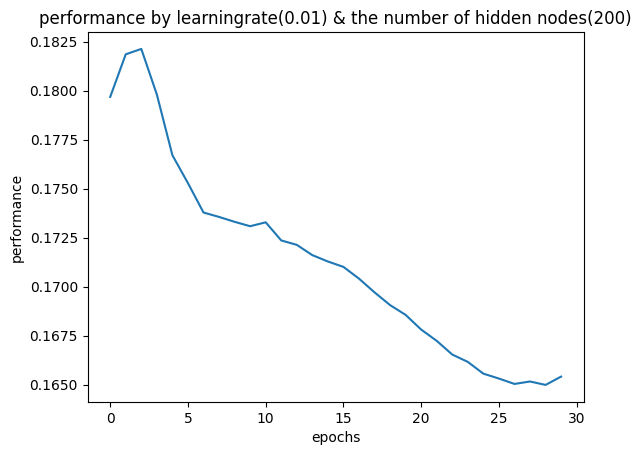

maximum performance: 0.18212955323883098 the epoch: 2


In [17]:
n_ANN()